# **Presentación del proyecto**

**Modelo para predicción de Rechazo de Prestamo**



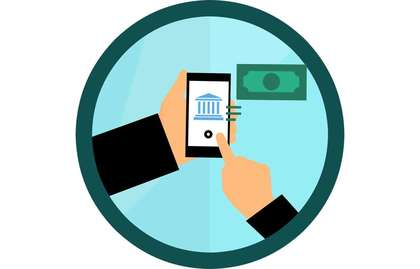

**Contexto Comercial y Analítico**

Del conjunto de datos de la Administración de Pequeñas Empresas de EE. UU. Podemos saber que alrededor del 17,6% de los préstamos garantizados por La Administración de Pequeñas Empresas de EE. UU. tiene un problema financiero. Si esta condición ocurre con una gran frecuencia y monto de préstamo, puede generar una gran pérdida para la SBA y el banco como prestamista y llevar a quiebra de la institución.

**Fuente**

https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied?resource=download

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

Dadas ciertas características como Código del sistema de clasificación de industrias de América del Norte,Negocio existente o Negocio nuevo, Línea de crédito renovable, Programa de préstamos es posible predecir si esa persona tiene un riesgo de cancelacion de credito.

**Objetivo**

La principal misión del proyecto es reducir el riesgo de cancelación de crédito. Préstamos para instituciones de la Administración de Pequeñas Empresas de EE. UU. haciendo aplicaciones basadas en aprendizaje automático para determinar la Solicitud de préstamo basada en datos históricos.

Un modelo adecuado para implementar es Logistic Regression, podriamos tambien probar otros como KNN, Random Forest o Support Vector Machines.

# **Instalacion de librerias**

In [1]:
! pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [2]:
! pip install bqplot
! pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.7 MB/s eta 0:00:00


# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="whitegrid")

#import warnings
#warnings.filterwarnings("ignore")

from   scipy import stats
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

**Lectura del dataset**

In [116]:
Banco=pd.read_csv("/content/drive/MyDrive/DataScience_2/SBAnational.csv")

<ipython-input-116-c36d706478fd>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  Banco=pd.read_csv("/content/drive/MyDrive/DataScience_2/SBAnational.csv")


In [117]:
data1 = pd.read_csv('/content/drive/MyDrive/DataScience_2/SBA_Loan_Data.csv')
data1.head(2)

,Unnamed: 0,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,...,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,Approve
0,0,84,2.0,60000,48000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,60,2.0,40000,32000,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


**Análisis inicial del dataset**

In [118]:
Banco.shape

(899164, 27)

In [119]:
Banco.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [120]:
Banco.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [121]:
Banco.tail()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"
899163,9996003010,PACIFIC TRADEWINDS FAN & LIGHT,KAILUA,HI,96734,CENTRAL PACIFIC BANK,HI,0,27-Feb-97,1997,...,N,N,NaN,31-May-97,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$24,000.00"


In [122]:
Banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [123]:
list_item = []
for col in Banco.columns:
    list_item.append([col, Banco[col].dtype, Banco[col].isna().sum(), round((Banco[col].isna().sum()/len(Banco[col]))*100,2),
                      Banco[col].nunique(), list(Banco[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)


In [124]:
dfDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,LoanNr_ChkDgt,int64,0,0.00,899164,"[2454233002, 3902584008, 2581554003, 560715300..."
1,Name,object,14,0.00,779583,"[OWENS DRAPERY & BLIND INSTALLA, Missionarts D..."
2,City,object,30,0.00,32581,"[Grand Rapids, ATLANTA, MANORVILLE, CASPER, LO..."
3,State,object,14,0.00,51,"[MT, FL, CA, TX, OH]"
4,Zip,int64,0,0.00,33611,"[13440, 37922, 54302, 24015, 19140]"
5,Bank,object,1559,0.17,5802,"[NORTH LOUISIANA BIDCO, LLC, GE CAP. SMALL BUS..."
6,BankState,object,1566,0.17,56,"[DE, OH, CT, NY, CA]"
7,NAICS,int64,0,0.00,1312,"[0, 722110, 561720]"
8,ApprovalDate,object,0,0.00,9859,"[9-Feb-96, 17-Nov-04, 16-Jan-07, 3-Jun-05, 21-..."
9,ApprovalFY,object,0,0.00,70,"[2008, 1999, 2004, 2007]"


##**Descripción de variables**

- LoanNr_ChkDgt : Identificador
- Name : Nombre del prestatario
- City : Ciudad Prestataria
- State : Estado prestatario
- Zip : Código postal del prestatario
- Bank : Nombre del banco
- BankState : Estado del banco
- NAICS : Código del sistema de clasificación de industrias de América del Norte.
- ApprovalDate : Fecha de emisión del compromiso de la SBA
- ApprovalFY : Año fiscal del compromiso
- Term : Plazo del préstamo en meses.
- NoEmp : Número de empleados comerciales
- NewExist : 1 = Negocio existente, 2 = Negocio nuevo
- CreateJob : Número de trabajos creados
- RetainedJob : Número de trabajos retenidos
- FranchiseCode : Código de franquicia, (00000 o 00001) = Sin franquicia
- UrbanRural : 1 = Urbano, 2 = rural, 0 = indefinido
- RevLineCr : Línea de crédito renovable: Y = Sí, N = No
- LowDoc : Programa de préstamos LowDoc: Y = Sí, N = No
- ChgOffDate : la fecha en la que se declara que un préstamo está en mora
- DisbursementDate : Fecha de desembolso
- DisbursementGross : Monto desembolsado
- BalanceGross : Monto bruto pendiente
- MIS_Status : estado del préstamo cancelado = CHGOFF, pagado en su totalidad = PIF
- ChgOffPrinGr : Monto cancelado
- GrAppv : Monto bruto del préstamo aprobado por el banco
- SBA_Appv : Monto garantizado del préstamo aprobado por la SBA

In [125]:
Banco.dtypes.value_counts()

,count
object,17
int64,9
float64,1


In [126]:
Banco.describe().T

,count,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.0,4.772612e+09,2.538175e+09,1.000014e+09,2.589758e+09,4.361439e+09,6.904627e+09,9.996003e+09
Zip,899164.0,5.380439e+04,3.118416e+04,0.000000e+00,2.758700e+04,5.541000e+04,8.370400e+04,9.999900e+04
NAICS,899164.0,3.986610e+05,2.633183e+05,0.000000e+00,2.352100e+05,4.453100e+05,5.617300e+05,9.281200e+05
Term,899164.0,1.107731e+02,7.885731e+01,0.000000e+00,6.000000e+01,8.400000e+01,1.200000e+02,5.690000e+02
NoEmp,899164.0,1.141135e+01,7.410820e+01,0.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,9.999000e+03
NewExist,899028.0,1.280404e+00,4.517500e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
CreateJob,899164.0,8.430376e+00,2.366882e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.800000e+03
RetainedJob,899164.0,1.079726e+01,2.371206e+02,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,9.500000e+03
FranchiseCode,899164.0,2.753726e+03,1.275802e+04,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999900e+04
UrbanRural,899164.0,7.577483e-01,6.464360e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [127]:
Banco.describe(include=['object']).T

,count,unique,top,freq
Name,899150,779583,SUBWAY,1269
City,899134,32581,LOS ANGELES,11558
State,899150,51,CA,130619
Bank,897605,5802,BANK OF AMERICA NATL ASSOC,86853
BankState,897598,56,CA,118116
ApprovalDate,899164,9859,7-Jul-93,1131
ApprovalFY,899164,70,2006,76040
RevLineCr,894636,18,N,420288
LowDoc,896582,8,N,782822
ChgOffDate,162699,6448,13-Mar-10,734


# **Limpieza y transformación de datos**

**Cambio de variables**

In [128]:
Banco.rename(columns={"LoanNr_ChkDgt":"Identifier"},inplace=True)


In [129]:
Banco.duplicated().sum()

0

In [130]:
Banco.isnull().sum()

,0
Identifier,0
Name,14
City,30
State,14
Zip,0
Bank,1559
BankState,1566
NAICS,0
ApprovalDate,0
ApprovalFY,0


In [131]:
Banco.fillna(Banco)

,Identifier,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


**Valores outliers**

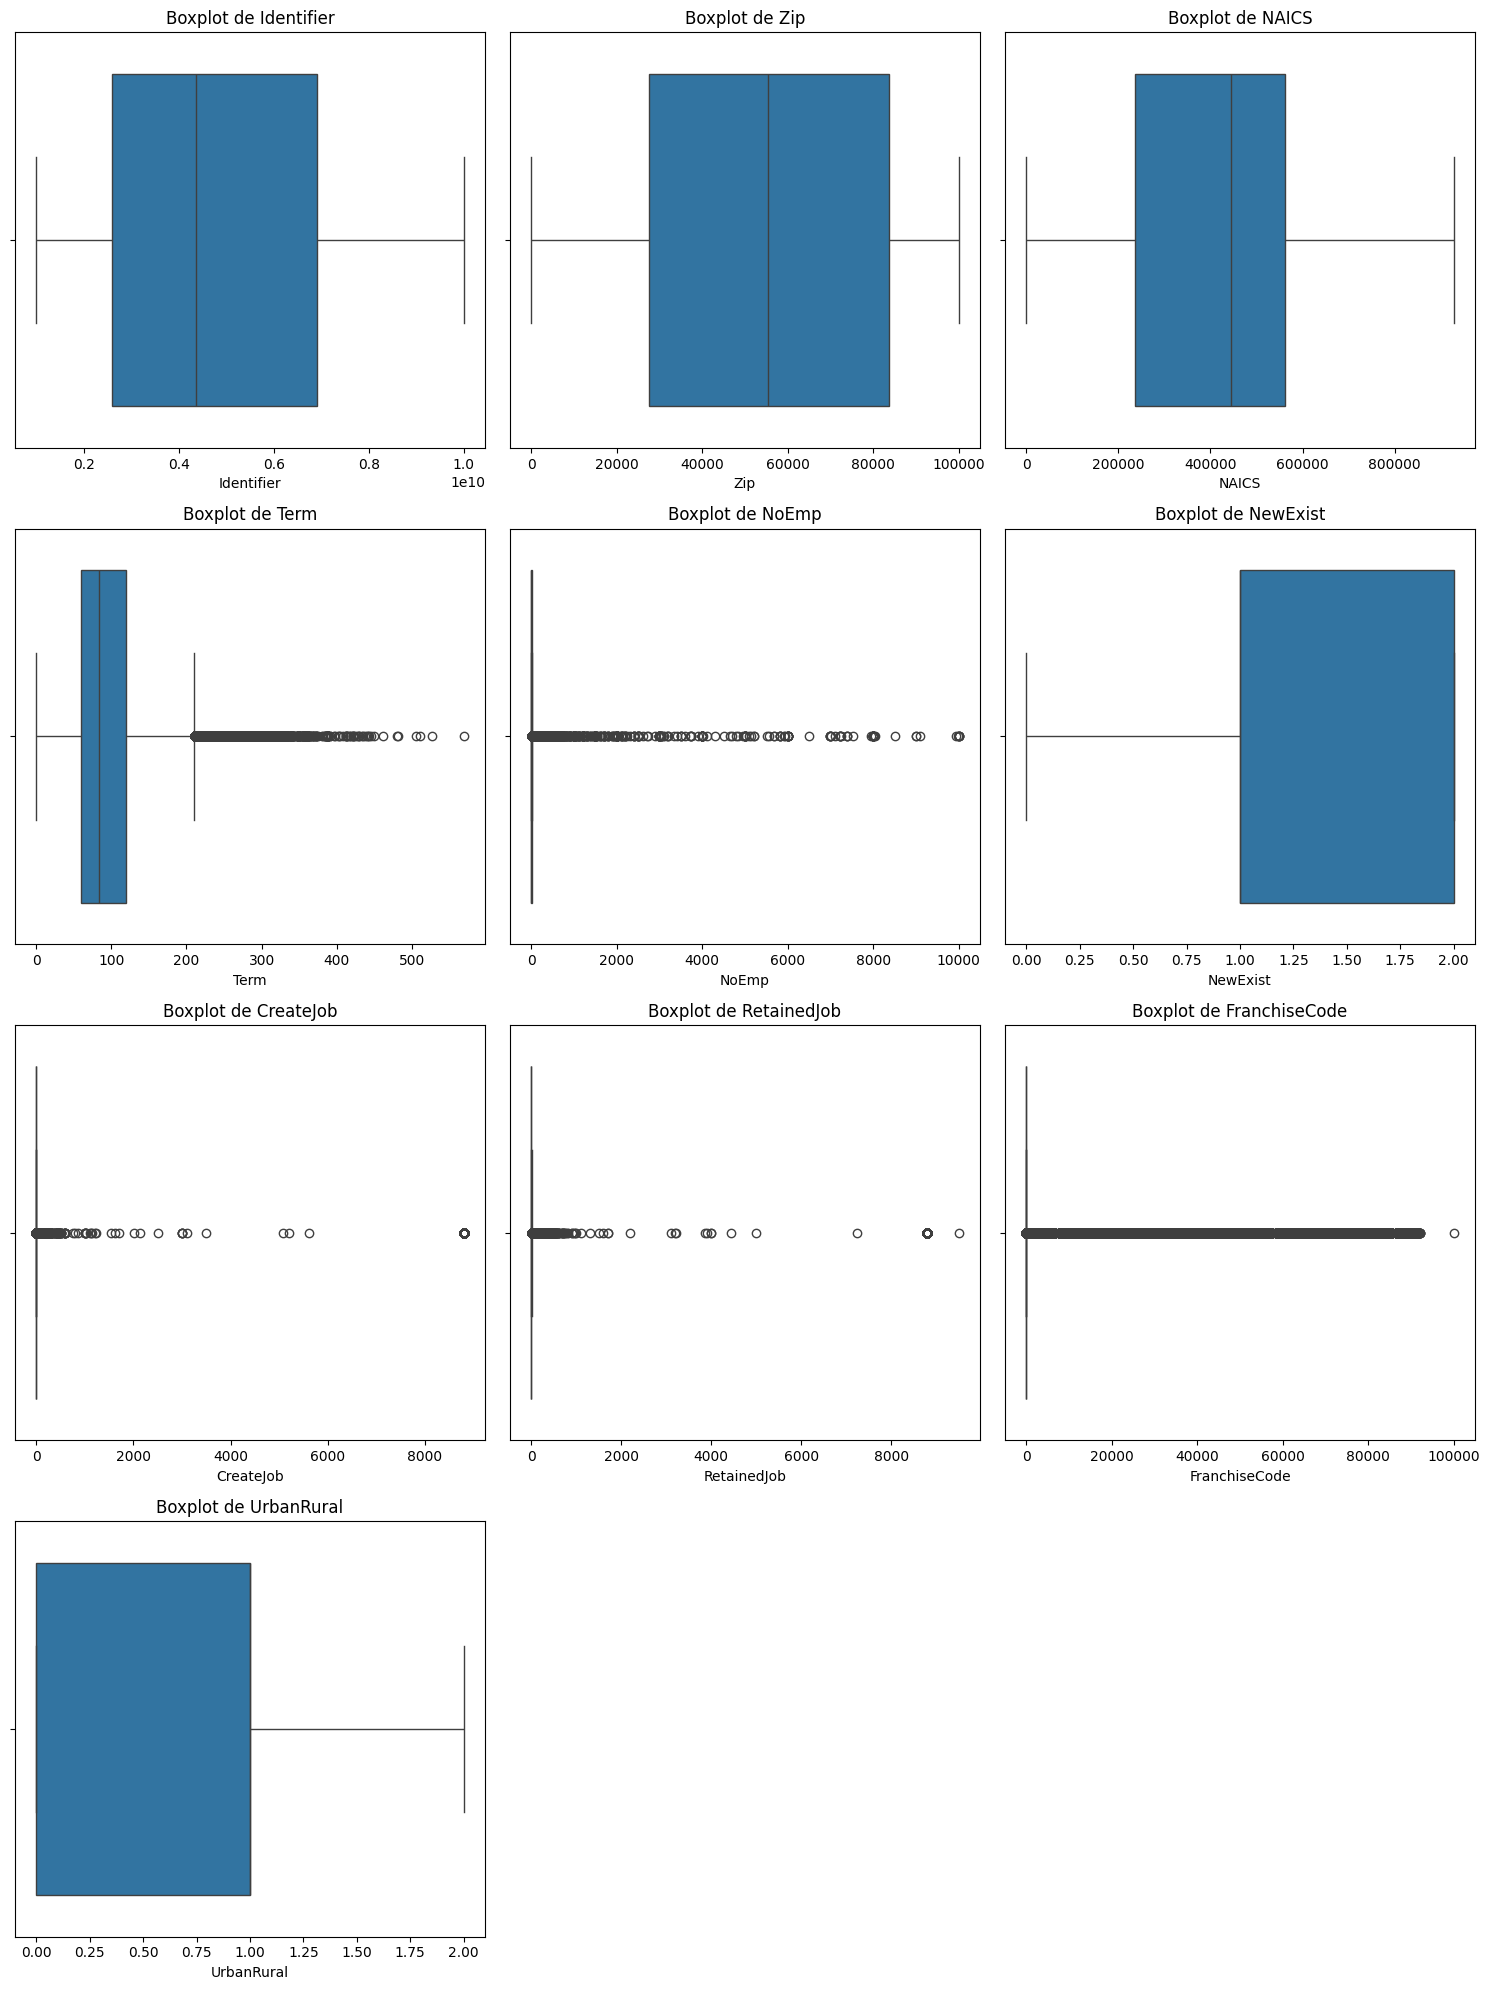

In [132]:
numeric_columns = Banco.select_dtypes(include=['int64', 'float64'])

# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=Banco[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()

## **Eliminar función no utilizada**

In [133]:

Banco = Banco.drop(['City', 'State', 'Zip','Bank','BankState','ApprovalDate','ApprovalFY'
                 ,'CreateJob','RetainedJob','FranchiseCode', 'ChgOffDate','DisbursementDate','BalanceGross',
                 'DisbursementGross','ChgOffPrinGr'], axis=1)

In [134]:
Banco

,Identifier,Name,NAICS,Term,NoEmp,NewExist,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,451120,84,4,2.0,0,N,Y,P I F,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),722410,60,2,2.0,0,N,Y,P I F,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",621210,180,7,1.0,0,N,N,P I F,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",0,60,2,1.0,0,N,Y,P I F,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",0,240,14,1.0,0,N,N,P I F,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,451120,60,6,1.0,0,0,N,P I F,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,451130,60,6,1.0,0,Y,N,P I F,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",332321,108,26,1.0,0,N,N,P I F,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",0,60,6,1.0,0,N,Y,CHGOFF,"$75,000.00","$60,000.00"


In [135]:
Banco.MIS_Status.value_counts()

,count
MIS_Status,
P I F,739609
CHGOFF,157558


## **Null y NaN**

Sabemos que hay algunos datos NaN y nulos. Dado que solo hay unos pocos datos con NaN y condición nula, podemos descartar los datos con esta condición.

In [136]:
Banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Identifier  899164 non-null  int64  
 1   Name        899150 non-null  object 
 2   NAICS       899164 non-null  int64  
 3   Term        899164 non-null  int64  
 4   NoEmp       899164 non-null  int64  
 5   NewExist    899028 non-null  float64
 6   UrbanRural  899164 non-null  int64  
 7   RevLineCr   894636 non-null  object 
 8   LowDoc      896582 non-null  object 
 9   MIS_Status  897167 non-null  object 
 10  GrAppv      899164 non-null  object 
 11  SBA_Appv    899164 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 82.3+ MB


In [137]:
Banco.dropna(inplace=True)

In [138]:
def currencyCleaning(x):
    x = x[1:].replace(',','')
    return x

In [139]:
Banco['GrAppv'] = Banco['GrAppv'].apply(currencyCleaning).astype(float).astype(int)
Banco['SBA_Appv'] = Banco['SBA_Appv'].apply(currencyCleaning).astype(float).astype(int)


In [140]:
MIS_Status = pd.get_dummies(Banco['MIS_Status'], drop_first=False)
Banco['Default'] = MIS_Status['CHGOFF']

# **Análisis Exploratorio de datos**

##**Porcentaje de incumplimiento**

**Hipotesis**

Queremos saber el porcentaje de incumplimiento. Habra muchas empresas que cancelaran el credito o no pagaran?

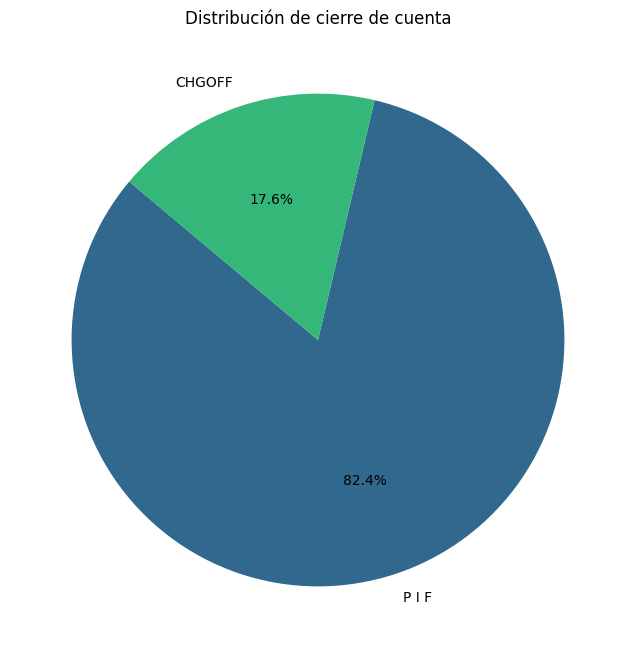

In [141]:
gender_counts = Banco['MIS_Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(gender_counts)))

plt.title('Distribución de cierre de cuenta')

plt.show()

Hay un 17,6% de los préstamos garantizados por la Administración de Pequeñas Empresas que tienen una condición de incumplimiento. Si esta condición ocurre con una gran frecuencia y monto de préstamo, puede generar una gran pérdida para la SBA y el banco como prestamista y llevar a la quiebra a la institución. Con el aprendizaje automático podemos disminuir el riesgo haciendo una predicción con datos históricos para analizar la probabilidad de que la nueva solicitud de préstamo pueda derivar en un impago.

##**Información sobre la empresa y la industria**

1. Empresa con el mayor préstamo



Sera que la empresa con mayor prestamo tambien tendra el mayor numero de emplado y asi el mayor plazo?

<Axes: xlabel='GrAppv', ylabel='Name'>

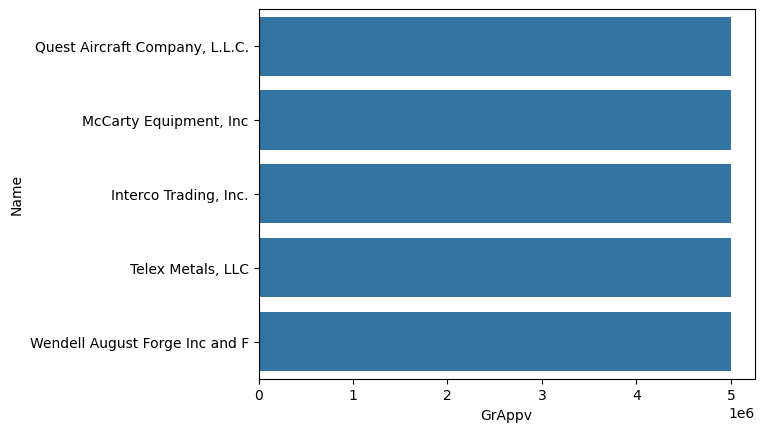

In [142]:
sns.barplot(x='GrAppv' , y='Name', data=Banco.sort_values('GrAppv', ascending=False).head(5), orient="h")

2. Empresa con mayor empleado


<ipython-input-143-d235865de8db>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NoEmp' , y='Name', data=Banco.sort_values('NoEmp',ascending=False).head(10), orient="h",palette="Blues_d")


<Axes: xlabel='NoEmp', ylabel='Name'>

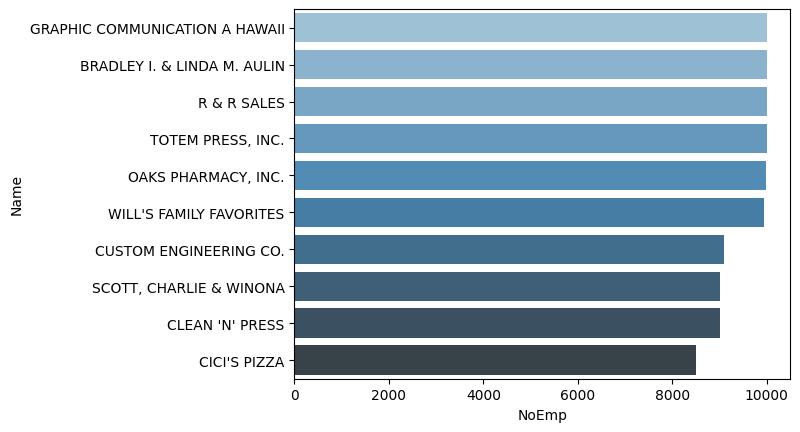

In [143]:
 sns.barplot(x='NoEmp' , y='Name', data=Banco.sort_values('NoEmp',ascending=False).head(10), orient="h",palette="Blues_d")



3. Empresa con mayor plazo

<ipython-input-144-8c73b7c86d1d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Term' , y='Name', data=Banco.sort_values('Term',ascending=False).head(10), orient="h", palette="Blues_d")


<Axes: xlabel='Term', ylabel='Name'>

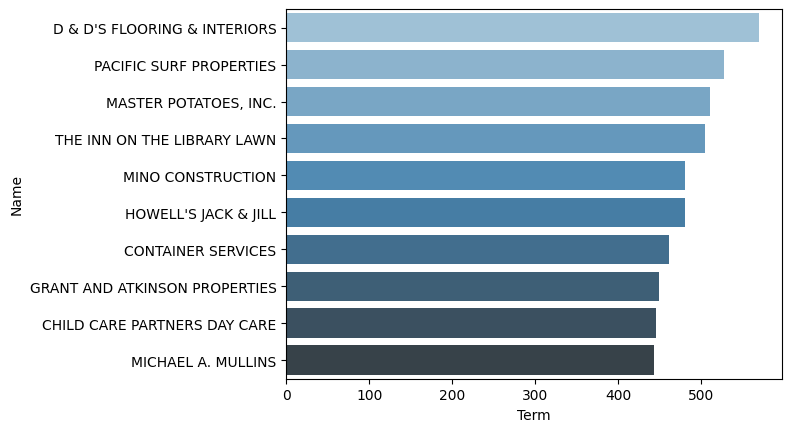

In [144]:
 sns.barplot(x='Term' , y='Name', data=Banco.sort_values('Term',ascending=False).head(10), orient="h", palette="Blues_d")


4.
Industria con más participantes



NAICS

- 11: Agricultura, silvicultura, pesca y caza.
- 21: Minería, canteras y extracción de petróleo y gas.
- 22: Utilidades
- 23: Construcción
- 31-33: Fabricación
- 42 : Comercio al por mayor
- 44-45 : Comercio al por menor
- 48-49: Transporte y almacenamiento.
- 51: Información
- 52 : Finanzas y seguros
- 53: Bienes inmuebles y alquiler y arrendamiento
- 54: Servicios profesionales, científicos y técnicos.
- 55 : Gestión de empresas y empresas.
- 56 : Servicio administrativo/soporte y gestión de residuos/remediación
- 61 : Servicios educativos
- 62 : Atención sanitaria y asistencia social
- 71: Arte, entretenimiento y recreación.
- 72: Servicios de alojamiento y alimentación.
- 81: Otros servicios (excepto administración pública)
- 92 : Administración pública

**Hipotesis**

Queremos saber cual es el sector con mas pretamos en todo el dataset sera que el sector que quire mas prestamos es el de Agricultura? ya que es el mas necesita.

In [145]:
def naicsEngenieria(x):
    x = str(x)
    x = x[:2]
    if (x == '31') | (x == '32') | (x == '33'):
        x = '31-33'
    elif (x == '44')| (x == '45'):
        x = '44-45'
    elif (x == '48') | (x == '49'):
        x = '48-49'
    return x

In [146]:
Banco.NAICS = Banco.NAICS.apply(naicsEngenieria)

In [147]:
NAICS = Banco[Banco.NAICS != '0']

In [148]:
print(f'La mayoría de las industrias: {NAICS.NAICS.value_counts()[0]}')
print(f'Porcentaje de la mayoría de las industrias: {round(NAICS.NAICS.value_counts()[0]/len(NAICS)*100,2)}%')

La mayoría de las industrias: 126144
Porcentaje de la mayoría de las industrias: 18.27%


<ipython-input-148-832fa1487fae>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'La mayoría de las industrias: {NAICS.NAICS.value_counts()[0]}')
<ipython-input-148-832fa1487fae>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Porcentaje de la mayoría de las industrias: {round(NAICS.NAICS.value_counts()[0]/len(NAICS)*100,2)}%')


<ipython-input-149-50d0b603932b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=NAICS1.index , y=NAICS1['Identifier'],palette="Blues_d")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '11'),
  Text(1, 0, '21'),
  Text(2, 0, '22'),
  Text(3, 0, '23'),
  Text(4, 0, '31-33'),
  Text(5, 0, '42'),
  Text(6, 0, '44-45'),
  Text(7, 0, '48-49'),
  Text(8, 0, '51'),
  Text(9, 0, '52'),
  Text(10, 0, '53'),
  Text(11, 0, '54'),
  Text(12, 0, '55'),
  Text(13, 0, '56'),
  Text(14, 0, '61'),
  Text(15, 0, '62'),
  Text(16, 0, '71'),
  Text(17, 0, '72'),
  Text(18, 0, '81'),
  Text(19, 0, '92')])

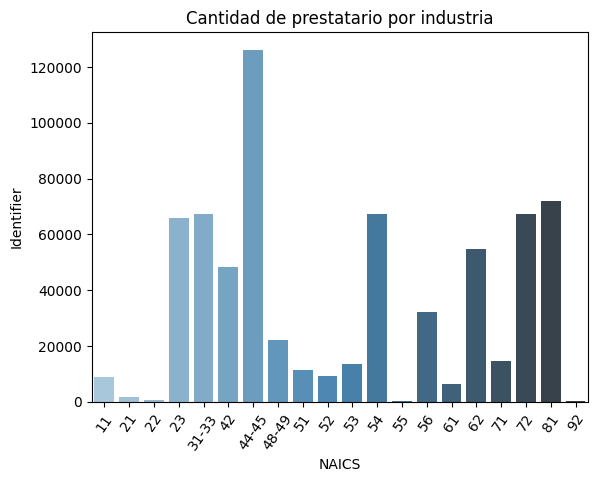

In [149]:
NAICS1 = NAICS.groupby('NAICS').count()
sns.barplot(x=NAICS1.index , y=NAICS1['Identifier'],palette="Blues_d")
plt.title('Cantidad de prestatario por industria')
plt.xticks(rotation=55)

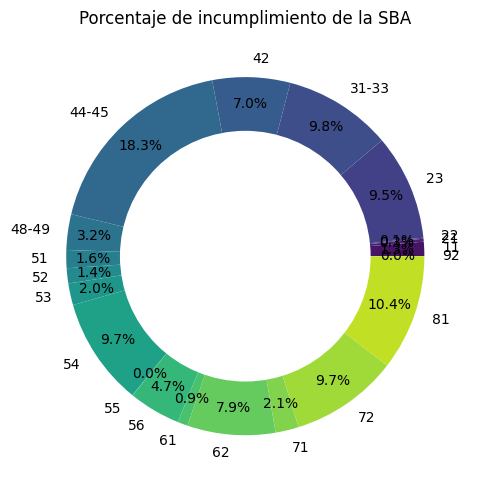

In [150]:
top_values = NAICS1['Identifier']
top_labels = NAICS1.index

plt.figure(figsize=(5, 5))
plt.pie(top_values, labels=top_labels, autopct='%1.1f%%',
        colors=sns.color_palette("viridis", len(NAICS1)), pctdistance=0.85)

# Dibuja un círculo en el medio para que parezca un donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Porcentaje de incumplimiento de la SBA')
plt.tight_layout()
plt.show()


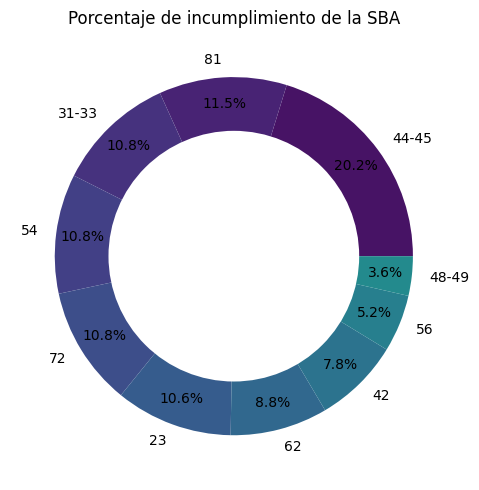

In [151]:
top_values = NAICS1['Identifier'].nlargest(10)
top_labels = top_values.index

plt.figure(figsize=(5, 5))
plt.pie(top_values, labels=top_labels, autopct='%1.1f%%',
        colors=sns.color_palette("viridis", len(NAICS1)), pctdistance=0.85)

# Dibuja un círculo en el medio para que parezca un donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Porcentaje de incumplimiento de la SBA')
plt.tight_layout()
plt.show()


Del diagrama de barras anterior, podemos concluir que la mayoría de los prestatarios provienen de la industria del comercio minorista con 126144 prestatarios o alrededor del 18,3% de todos los prestatarios.

Podemos saber la NAICS consultandolo aqui: https://www.inegi.org.mx/scian/


5. Porcentaje de incumplimiento por industria

**Hipotesis**

El sector con mayor incumplimiento sera el sector del comercio minorista ya que es el que abarca mayor porcentaje?

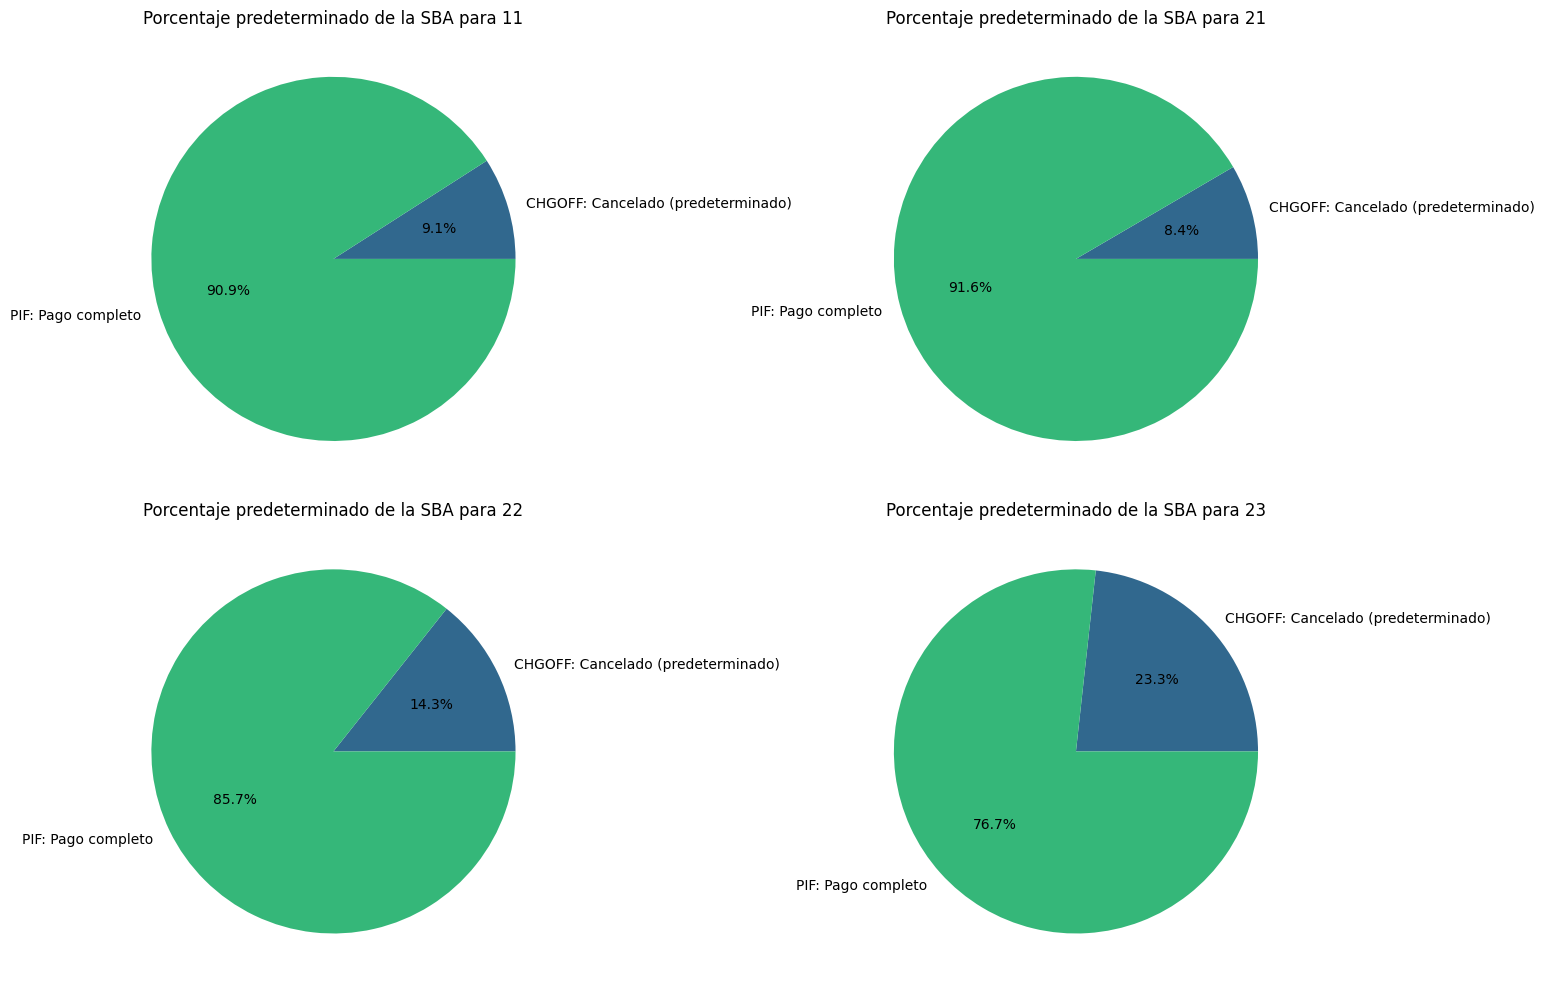

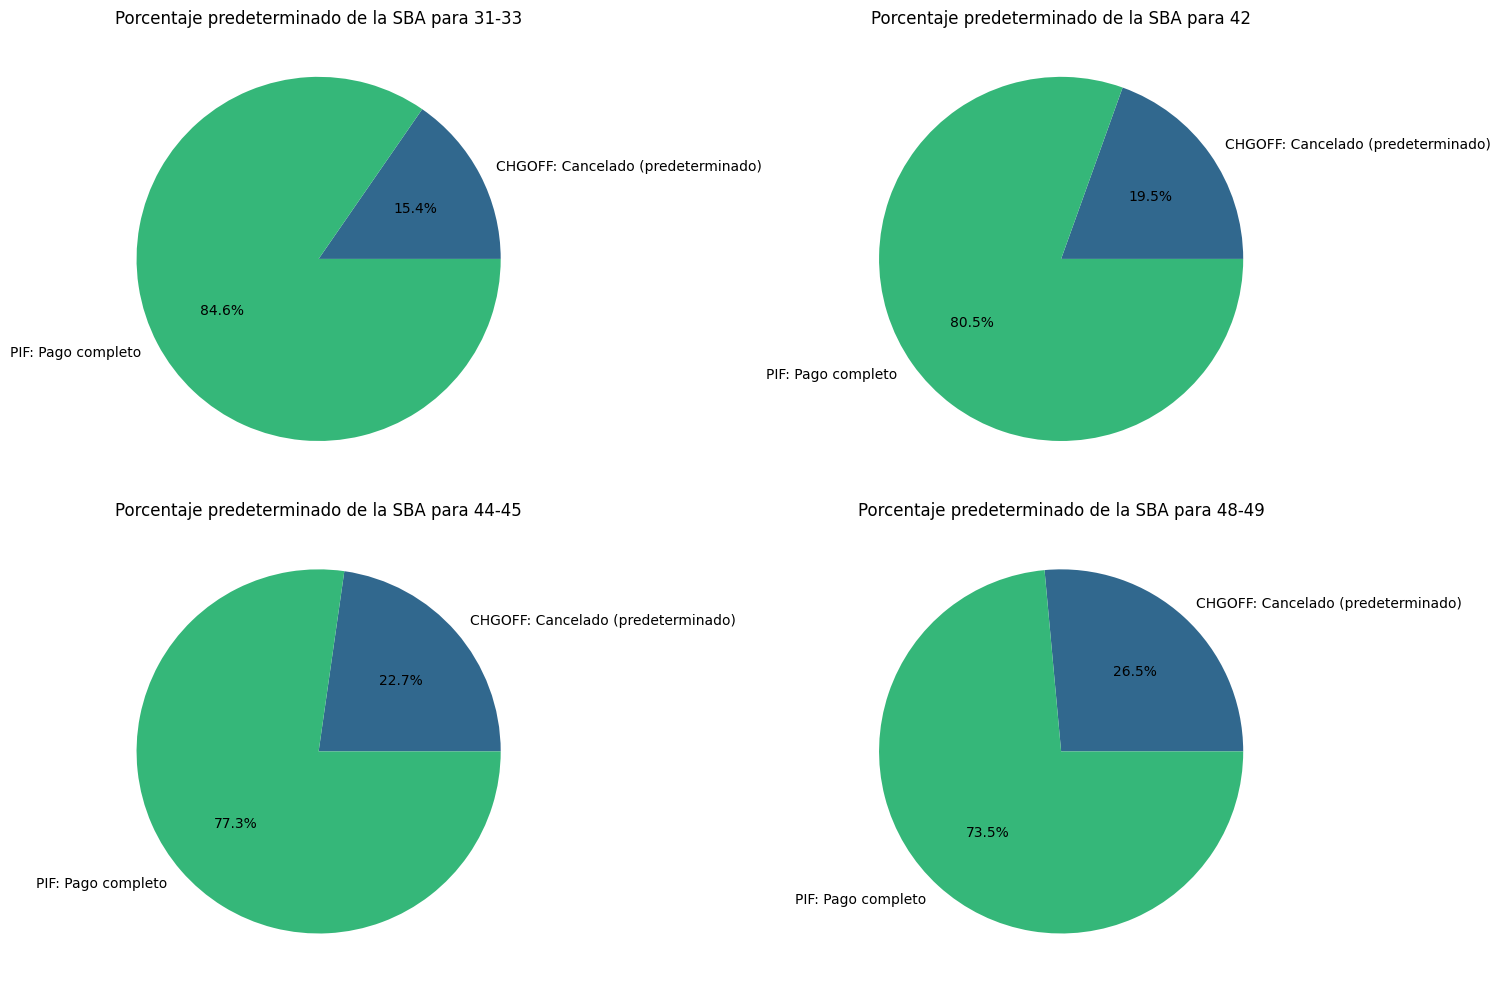

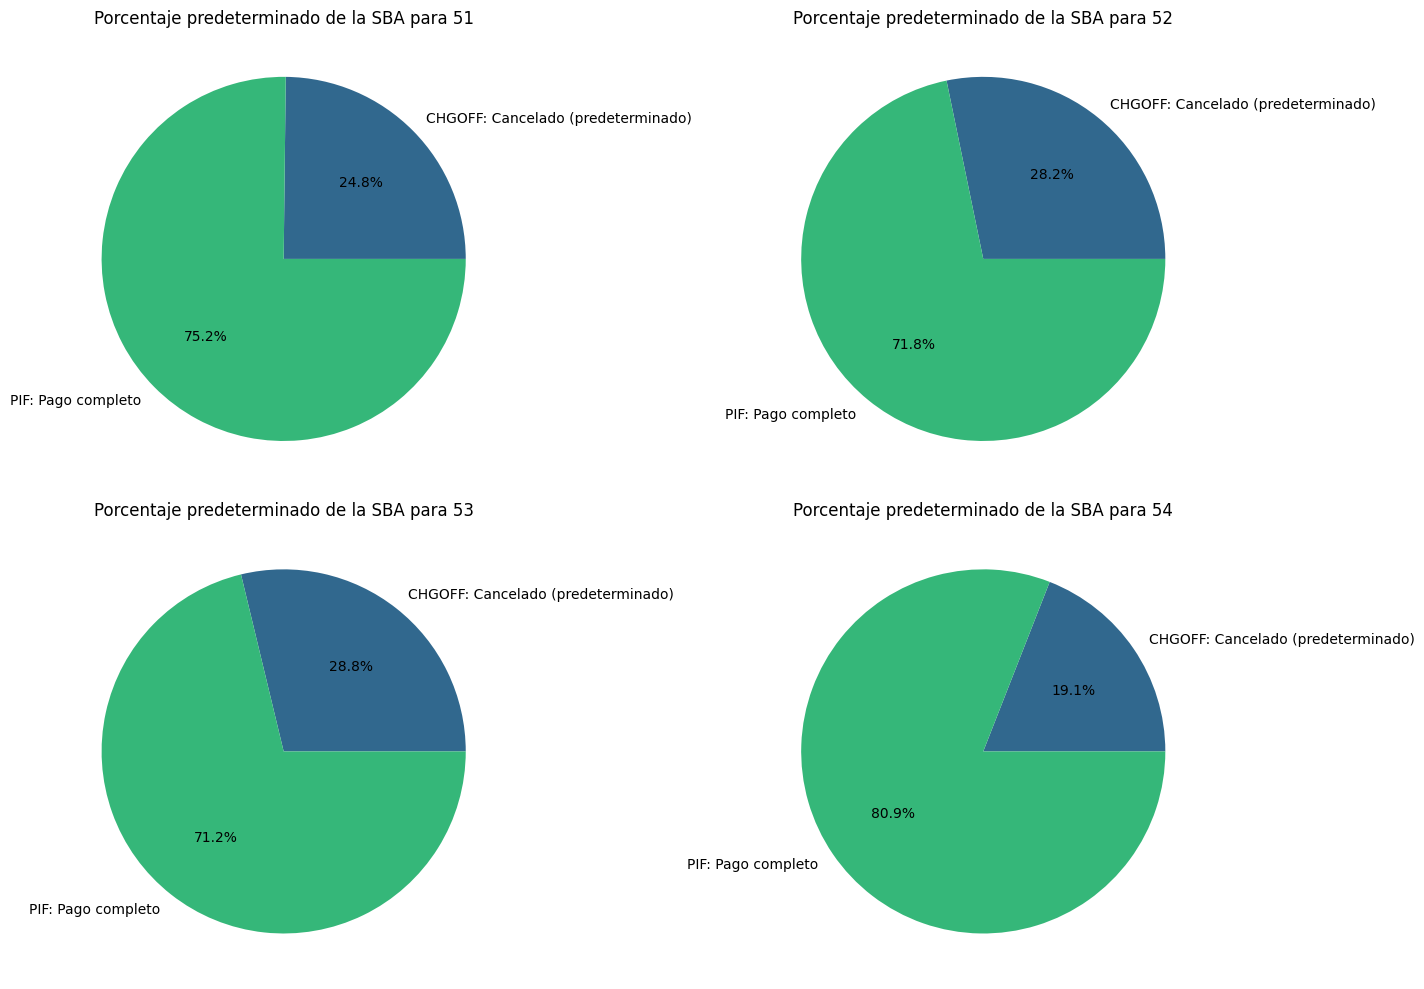

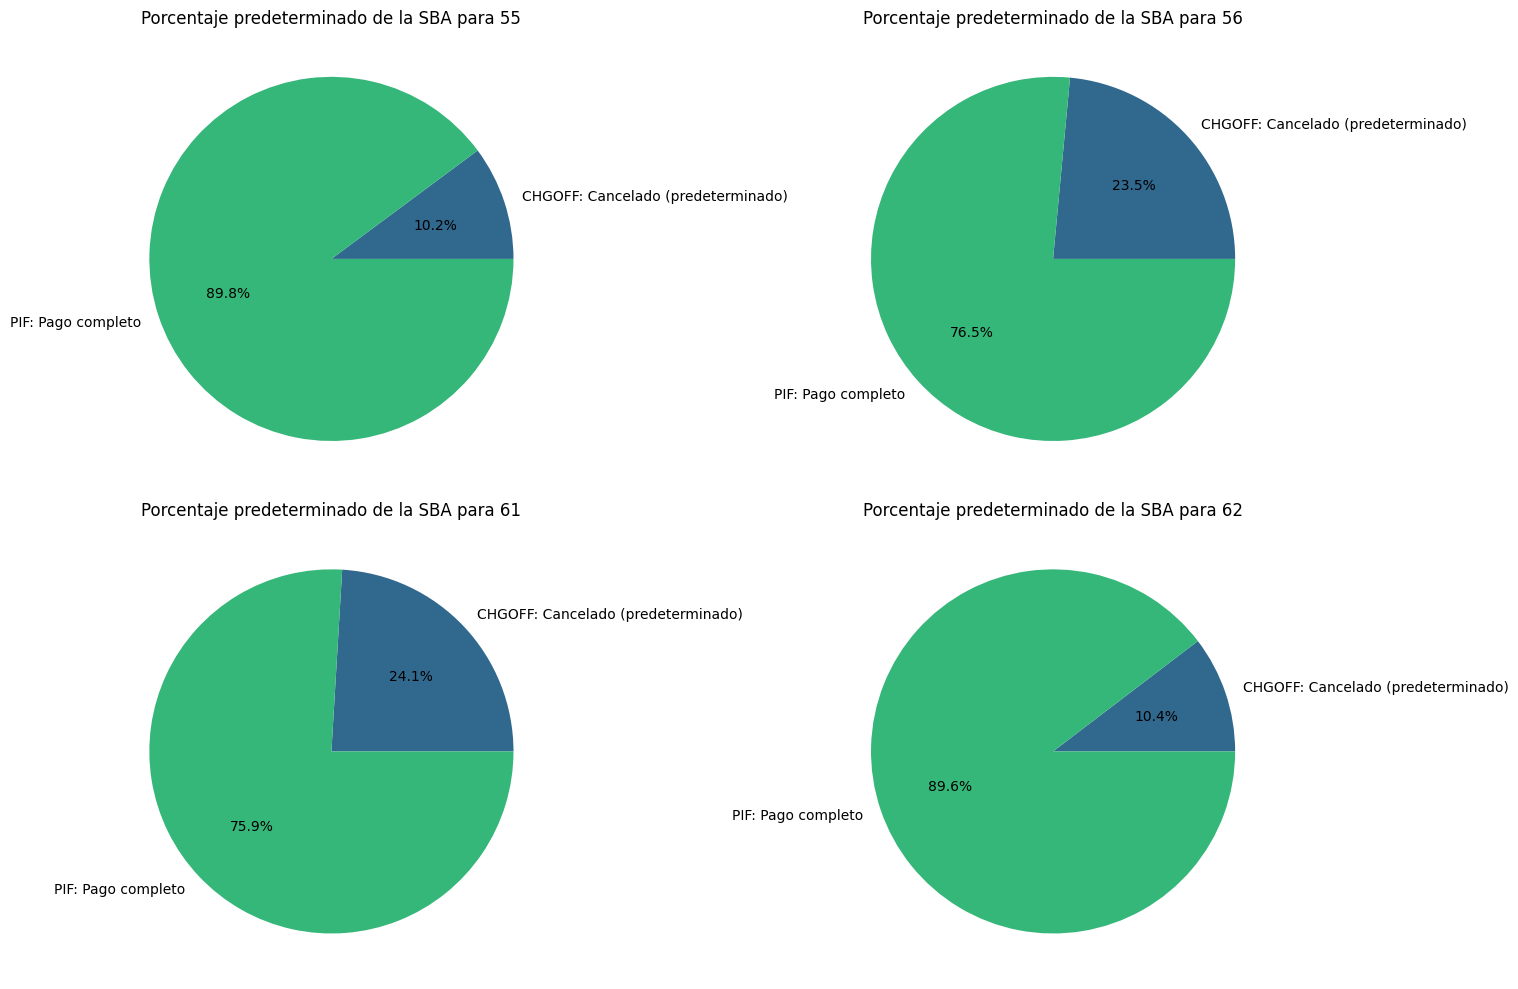

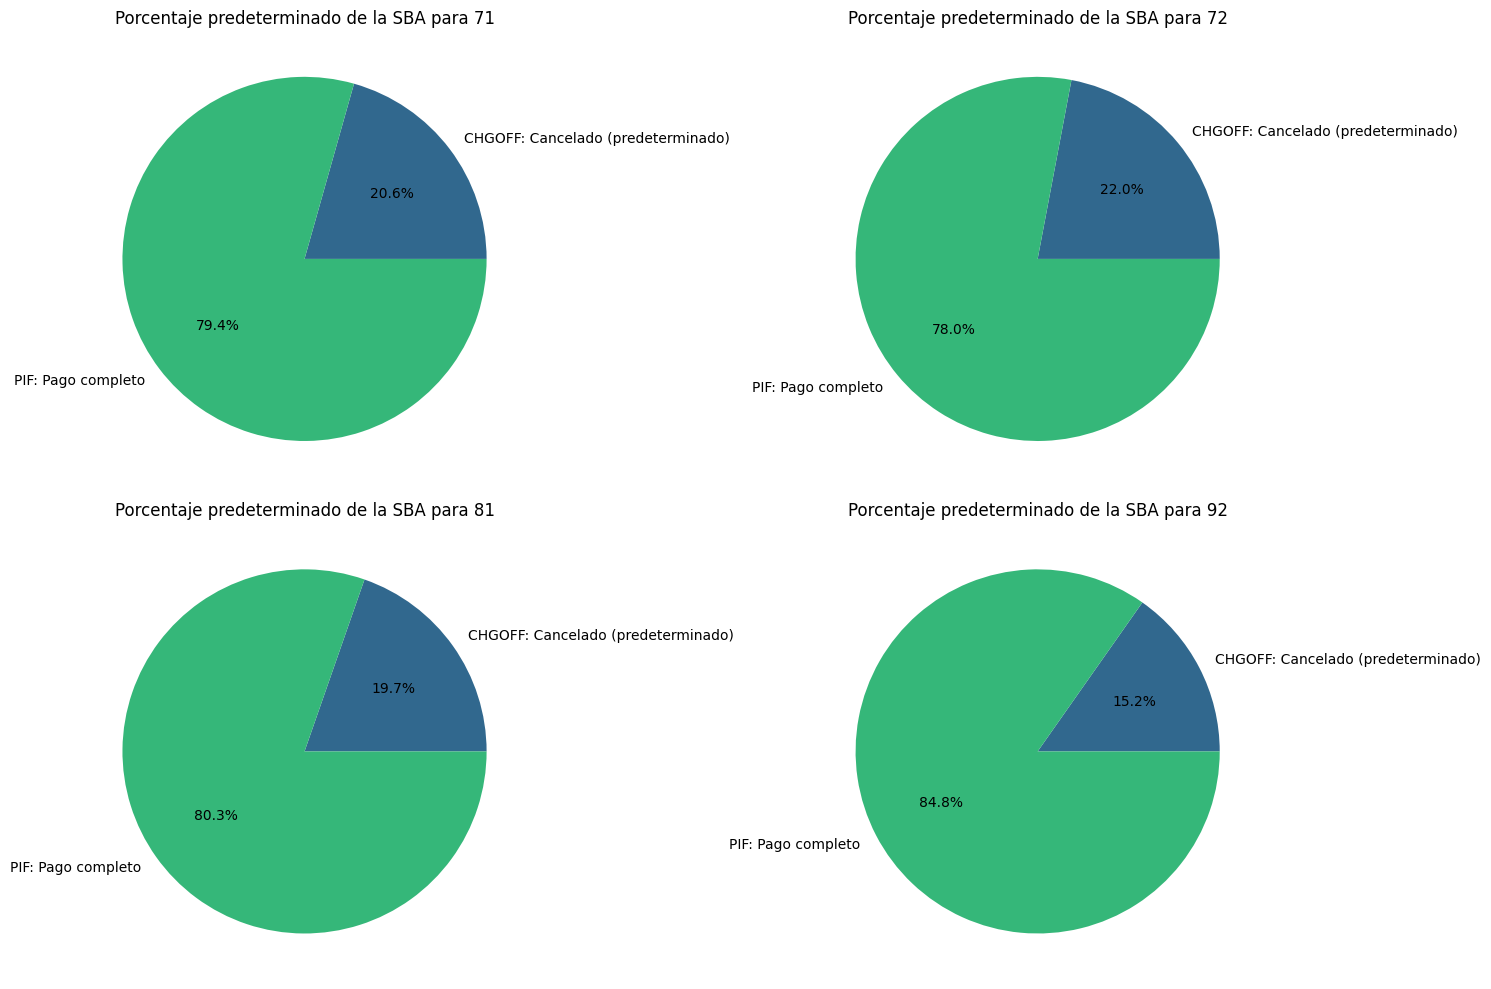

In [152]:
x = 0
y = 221
for i in NAICS1.index:
    if (x % 4) == 0:
        plt.figure(figsize=(15,10))
        y=221
        plt.subplot(y)
        y+=1
    else:
        plt.subplot(y)
        y+=1
    pieBanco = Banco[Banco.NAICS==i].groupby('MIS_Status').count()
    values = pieBanco['Identifier']
    labels = ['CHGOFF: Cancelado (predeterminado)', 'PIF: Pago completo']
    plt.pie(values, labels = labels, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(pieBanco)))
    plt.title(f'Porcentaje predeterminado de la SBA para {i}')
    plt.tight_layout()
    plt.show
    x+=1


Con este gráfico circular, podemos concluir que una industria diferente tiene un riesgo diferente. Algunas industrias solo reciben menos del 10 por ciento de la población, mientras que otras industrias pueden llegar a más del 25 por ciento de su población. Nos podemos percatar que el sector basandonos unicamente en su poblacion que tiene mas incumplimientos es el 53: Bienes inmuebles y alquiler y arrendamiento, ya que cuenta con 28.8 porciento. (Claro esta que el que tendria mas en numero es el Sector Minorista).

6. Nuevo o Existente

**Hipotesis**

Sera que por ser empresa nueva este va tener mayor risgo de incumplimiento?

In [153]:
Banco.NewExist.unique()

array([2., 1., 0.])

<ipython-input-154-d50d5eb7d2a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteos.index, y=conteos.values, palette="Blues_d")


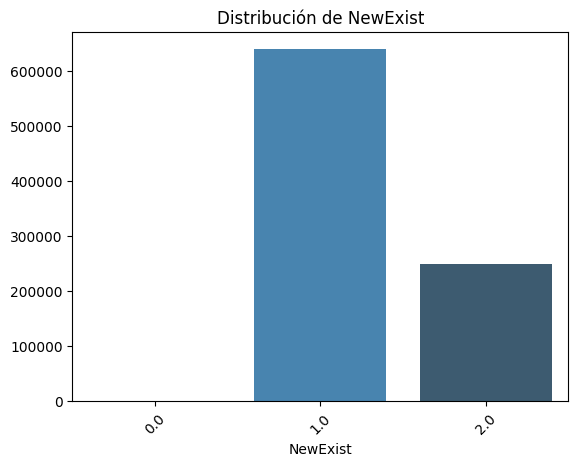

In [154]:
conteos = Banco['NewExist'].value_counts()

sns.barplot(x=conteos.index, y=conteos.values, palette="Blues_d")
plt.title('Distribución de NewExist')
plt.xticks(rotation=45)
plt.show()
# 1: Negocio existente, 2: Negocio nuevo
#sns.countplot(x=Banco[(Banco.NewExist == 1) | (Banco.NewExist == 2)].NewExist)

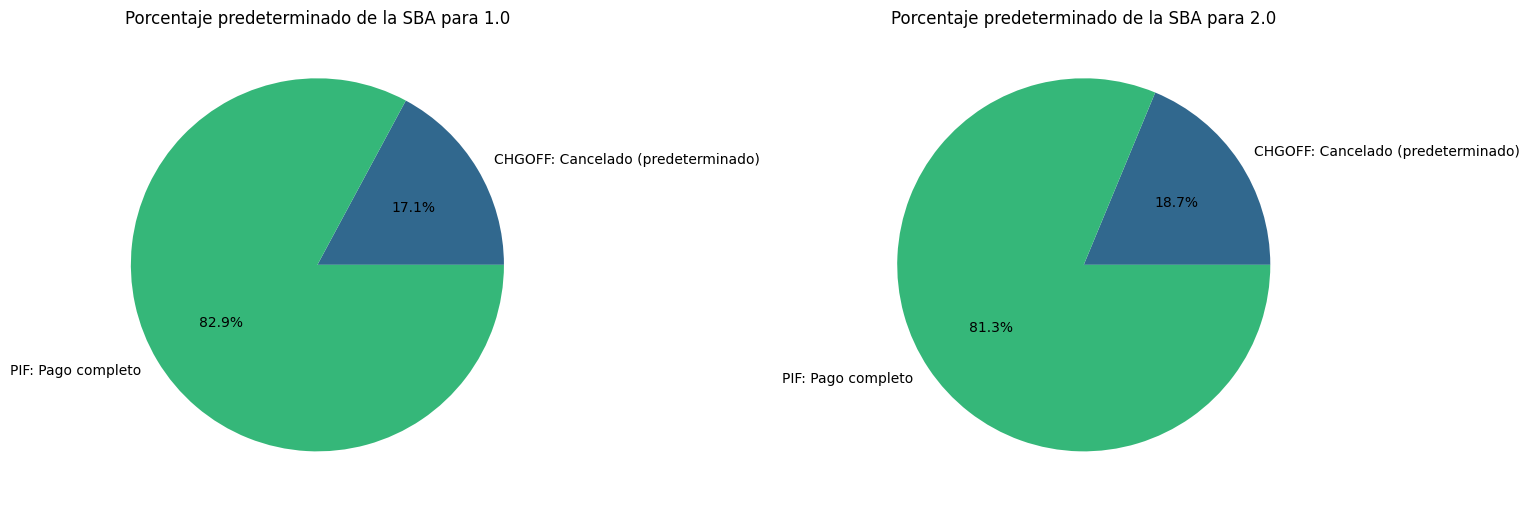

In [155]:
x = 0
y = 221
for i in Banco[(Banco.NewExist == 1) | (Banco.NewExist == 2)].groupby('NewExist').count().index:
    if (x % 4) == 0:
        plt.figure(figsize=(16,10))
        y=221
        plt.subplot(y)
        y+=1
    else:
        plt.subplot(y)
        y+=1
    pieBanco = Banco[Banco.NewExist==i].groupby('MIS_Status').count()
    values = pieBanco['Identifier']
    labels = ['CHGOFF: Cancelado (predeterminado)', 'PIF: Pago completo']
    plt.pie(values, labels = labels, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(pieBanco)))
    plt.title(f'Porcentaje predeterminado de la SBA para {i}')
    plt.tight_layout()
    plt.show
    x+=1

Aqui podemos decir que tiene un poco mas de riesgo la empresa que sea nueva aun que nos es mucho comparado por los que ya estan existentes, claro tenemos que ver que hay mas empresas existentes que nuevas por lo tanto tendremos mas riesgo de incumplimiento en existetes.

7. Urbano y rural

In [156]:
Banco.UrbanRural.unique()

array([0, 1, 2])

<ipython-input-157-967f431dd1c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteos.index, y=conteos.values, palette="Blues_d")


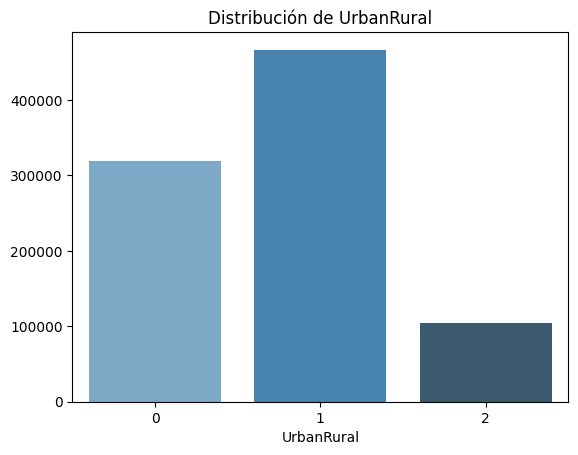

In [157]:
conteos = Banco['UrbanRural'].value_counts()

sns.barplot(x=conteos.index, y=conteos.values, palette="Blues_d")
plt.title('Distribución de UrbanRural')
plt.show()


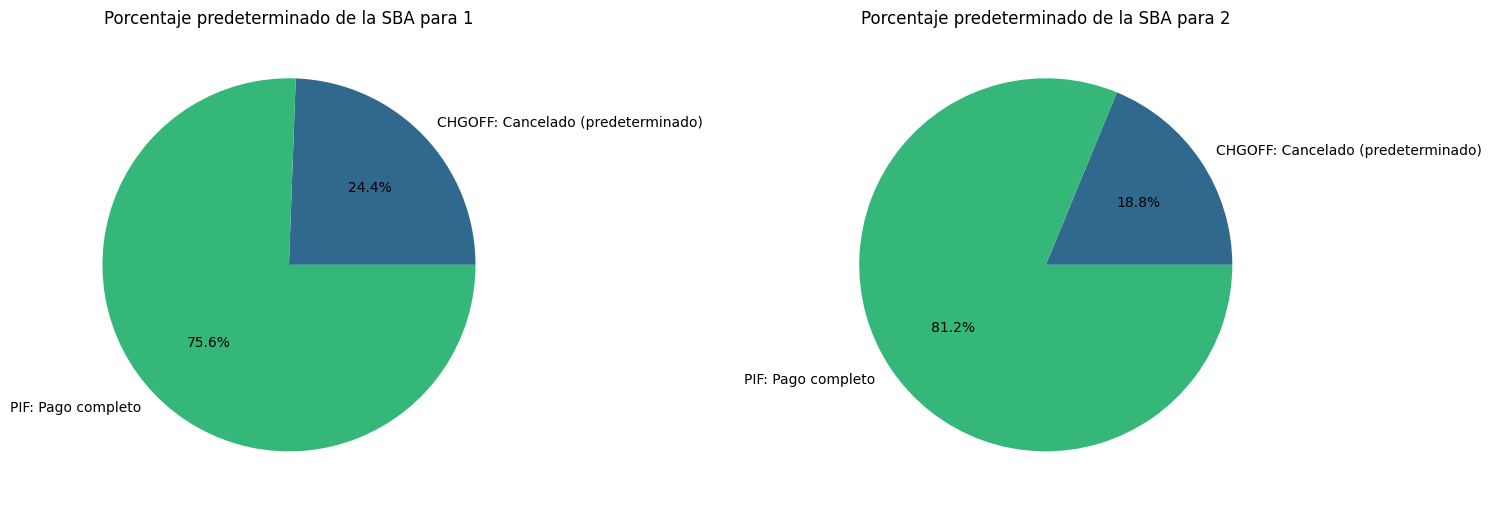

In [158]:
x = 0
y = 221
for i in Banco[(Banco.UrbanRural == 1) | (Banco.UrbanRural == 2)].groupby('UrbanRural').count().index:
    if (x % 4) == 0:
        plt.figure(figsize=(16,10))
        y=221
        plt.subplot(y)
        y+=1
    else:
        plt.subplot(y)
        y+=1
    pieBanco = Banco[Banco.UrbanRural==i].groupby('MIS_Status').count()
    values = pieBanco['Identifier']
    labels = ['CHGOFF: Cancelado (predeterminado)', 'PIF: Pago completo']
    plt.pie(values, labels = labels, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(pieBanco)))
    plt.title(f'Porcentaje predeterminado de la SBA para {i}')
    plt.tight_layout()
    plt.show
    x+=1

8. RevLineCr

Una vez que se ha pagado el cridito hay mayor posibilidad de que te den otro y este de que haya mayor incumplimiento?

Línea de crédito renovable, lo que significa que si el préstamo se ha pagado, el préstamo podrá volver a solicitarse inmediatamente. Puede afectar a la psicología financiera que afecta el comportamiento de su prestatario.

Y=si ,N=No

<ipython-input-159-880c8cbdd311>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Banco[(Banco.RevLineCr == 'N') | (Banco.RevLineCr == 'Y')].RevLineCr, palette="Blues_d")


<Axes: xlabel='RevLineCr', ylabel='count'>

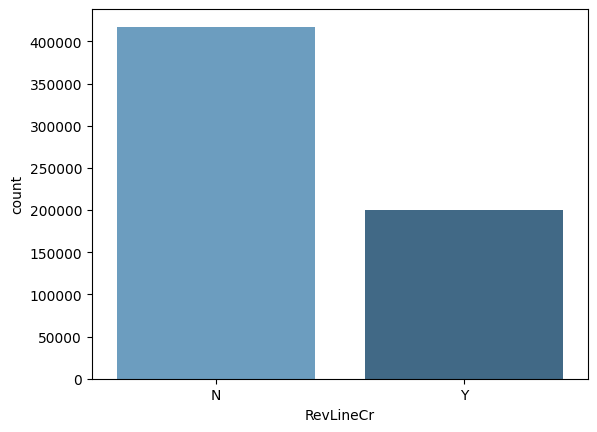

In [159]:
sns.countplot(x=Banco[(Banco.RevLineCr == 'N') | (Banco.RevLineCr == 'Y')].RevLineCr, palette="Blues_d")


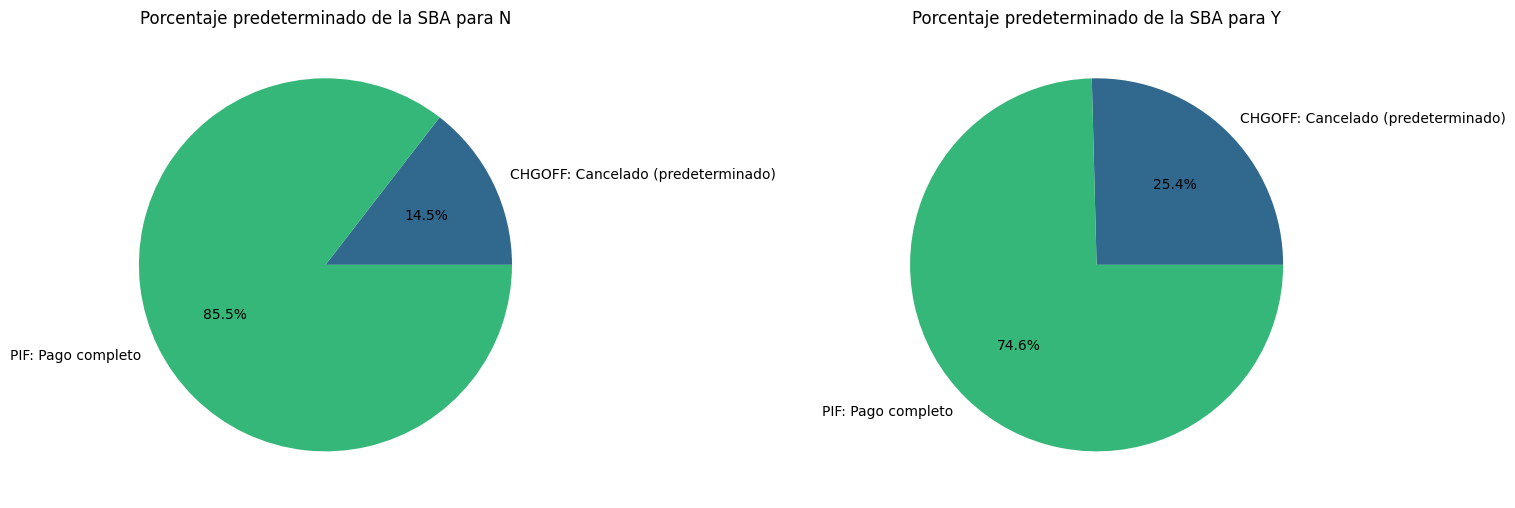

In [160]:
x = 0
y = 221
for i in Banco[(Banco.RevLineCr == 'N') | (Banco.RevLineCr == 'Y')].groupby('RevLineCr').count().index:
    if (x % 4) == 0:
        plt.figure(figsize=(16,10))
        y=221
        plt.subplot(y)
        y+=1
    else:
        plt.subplot(y)
        y+=1
    pieBanco = Banco[Banco.RevLineCr==i].groupby('MIS_Status').count()
    values = pieBanco['Identifier']
    labels = ['CHGOFF: Cancelado (predeterminado)', 'PIF: Pago completo']
    plt.pie(values, labels = labels, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(pieBanco)))
    plt.title(f'Porcentaje predeterminado de la SBA para {i}')
    plt.tight_layout()
    plt.show
    x+=1

Nos damos cuenta que es mas problable que o mas bien aumento el porcentaje de que se le volviera a dar un prestamo y este lo cancele por lo cual hay mayor riesgo en dar denuevo el credito.

9. LowDoc



**Hipotesis**


queremos saber el risgo de dar prestamo con poca administracion y si se aceptaran a muchas empresas ?, Creo seran muy pocas las empresas que les den el credito con muy poca administracion.

Programa de préstamos LowDoc que significa pedir prestado con poca administración. Puede afectar a la psicología financiera que afecta el comportamiento de su prestatario.

<ipython-input-161-9eafbd27413e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Banco[(Banco.LowDoc == 'N') | (Banco.LowDoc == 'Y')].LowDoc, palette="Blues_d")


<Axes: xlabel='LowDoc', ylabel='count'>

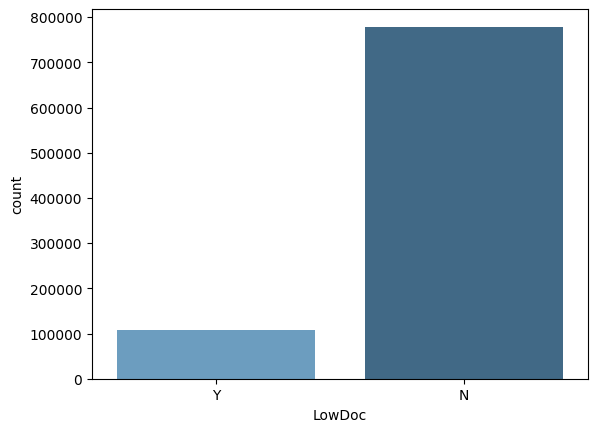

In [161]:
sns.countplot(x=Banco[(Banco.LowDoc == 'N') | (Banco.LowDoc == 'Y')].LowDoc, palette="Blues_d")

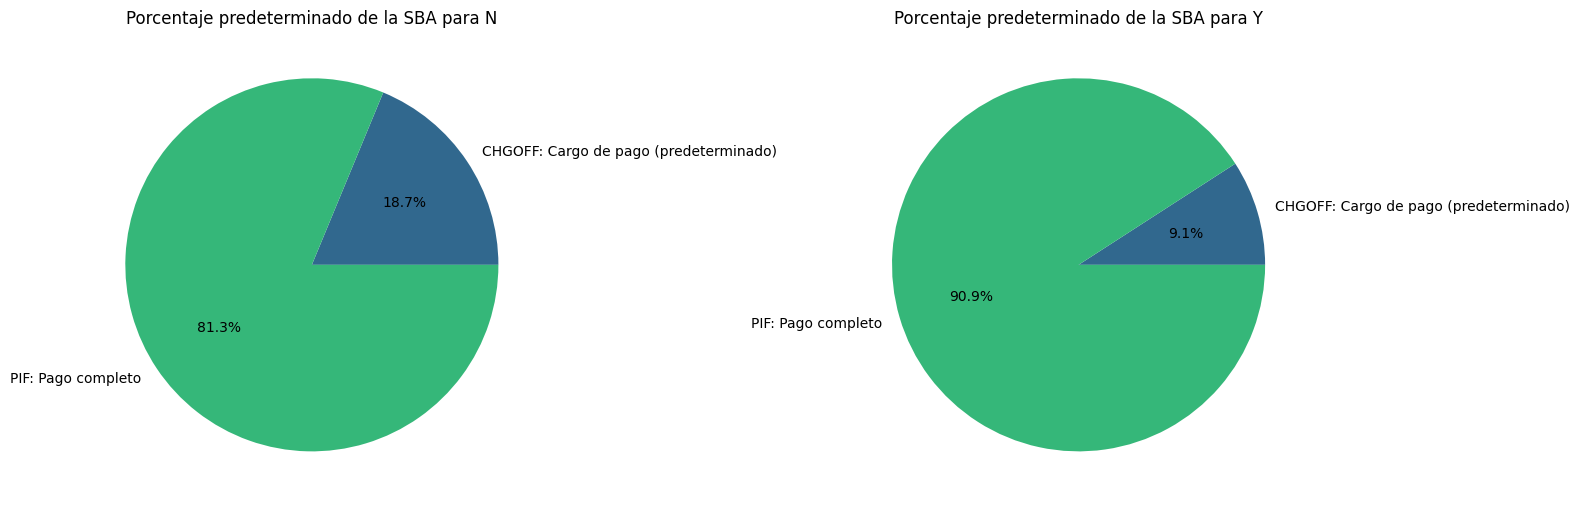

In [162]:
x = 0
y = 221
for i in Banco[(Banco.LowDoc == 'N') | (Banco.LowDoc == 'Y')].groupby('LowDoc').count().index:
    if (x % 4) == 0:
        plt.figure(figsize=(16,10))
        y=221
        plt.subplot(y)
        y+=1
    else:
        plt.subplot(y)
        y+=1
    pieBanco = Banco[Banco.LowDoc==i].groupby('MIS_Status').count()
    values = pieBanco['Identifier']
    labels = ['CHGOFF: Cargo de pago (predeterminado)', 'PIF: Pago completo']
    plt.pie(values, labels = labels, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(pieBanco)))
    plt.title(f'Porcentaje predeterminado de la SBA para {i}')
    plt.tight_layout()
    plt.show
    x+=1

Nos damos cuenta que al tener poca administracion baja mucho el porcentaje de las empresas que incumplen por cual el risgo es menor.Aun que es mucho menor el numeros que las personas que son rechadas esto nos damos cuenta con el grafico.

11. Correlación entre plazo y monto bruto


In [163]:
MIS_Status = pd.get_dummies(Banco['MIS_Status'], drop_first=True)

<Axes: xlabel='GrAppv', ylabel='Term'>

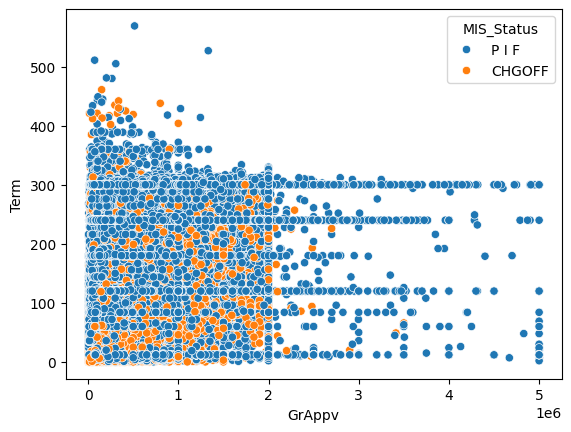

In [164]:
sns.scatterplot(x=Banco["GrAppv"], y=Banco["Term"],hue=Banco["MIS_Status"])

In [165]:
data1[['GrAppv','SBA_Appv','Term','Approve']].corr()

,GrAppv,SBA_Appv,Term,Approve
GrAppv,1.000000,0.981520,0.460258,0.138798
SBA_Appv,0.981520,1.000000,0.495474,0.148743
Term,0.460258,0.495474,1.000000,0.338688
Approve,0.138798,0.148743,0.338688,1.000000


<Axes: >

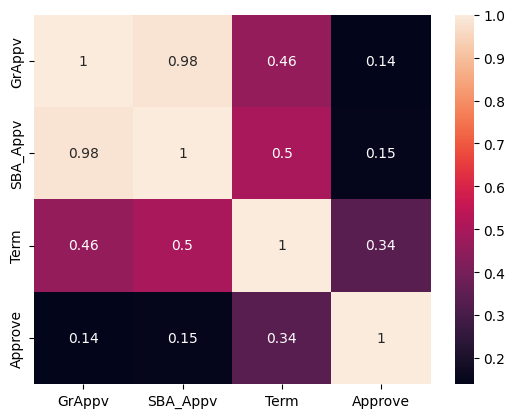

In [166]:
sns.heatmap(data1[['GrAppv','SBA_Appv','Term','Approve']].corr(), annot=True)

Al observar el diagrama de dispersión y el mapa de calor, a pesar de tener un bajo nivel de relación entre las cuatro características, estas cuatro características tienden a reforzarse entre sí con una relación positiva.

# **Procesamiento de datos categóricos**

In [86]:
Banco = Banco.drop(['Identifier', 'Name','UrbanRural','NoEmp','Default'], axis=1)


Algunos datos categóricos tienen una categoría no identificada. Necesitamos asegurarnos de que toda esta categoría esté de acuerdo con la condición real cuando el modelo está funcionando.

In [87]:
list_item = []
for col in Banco.columns:
    list_item.append([col, Banco[col].dtype, Banco[col].isna().sum(), round((Banco[col].isna().sum()/len(Banco[col]))*100,2),
                      Banco[col].nunique(), list(Banco[col].sample(5).drop_duplicates().values)])

dataDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [88]:
dataDesc


,feature,data_type,null,nulPct,unique,uniqueSample
0,NAICS,object,0,0.0,21,"[44-45, 42, 81, 48-49]"
1,Term,int64,0,0.0,411,"[300, 36, 85, 84, 12]"
2,NewExist,float64,0,0.0,3,"[1.0, 2.0]"
3,RevLineCr,object,0,0.0,18,"[0, Y, N]"
4,LowDoc,object,0,0.0,8,[N]
5,MIS_Status,object,0,0.0,2,"[CHGOFF, P I F]"
6,GrAppv,int64,0,0.0,21958,"[536000, 30000, 175000, 50000, 18000]"
7,SBA_Appv,int64,0,0.0,38033,"[750000, 312000, 5000, 222000]"


In [89]:
for x in Banco[['NewExist', 'RevLineCr','LowDoc','MIS_Status']].columns:
    print(f'{x}: \n{Banco[x].unique()}\n')

NewExist: 
[2. 1. 0.]

RevLineCr: 
['N' '0' 'Y' 'T' '`' ',' '1' 'C' '3' '2' 'R' '7' 'A' '5' '.' '4' '-' 'Q']

LowDoc: 
['Y' 'N' 'C' '1' 'S' 'R' 'A' '0']

MIS_Status: 
['P I F' 'CHGOFF']



In [90]:
data=Banco
data

,NAICS,Term,NewExist,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,44-45,84,2.0,N,Y,P I F,60000,48000
1,72,60,2.0,N,Y,P I F,40000,32000
2,62,180,1.0,N,N,P I F,287000,215250
3,0,60,1.0,N,Y,P I F,35000,28000
4,0,240,1.0,N,N,P I F,229000,229000
...,...,...,...,...,...,...,...,...
899159,44-45,60,1.0,0,N,P I F,70000,56000
899160,44-45,60,1.0,Y,N,P I F,85000,42500
899161,31-33,108,1.0,N,N,P I F,300000,225000
899162,0,60,1.0,N,Y,CHGOFF,75000,60000


In [91]:
NAICS = pd.get_dummies(data['NAICS'], prefix='NAICS', drop_first=False)
RevLineCr = pd.get_dummies(data['RevLineCr'], drop_first=True)
LowDoc = pd.get_dummies(data['LowDoc'], drop_first=True)
MIS_Status = pd.get_dummies(data['MIS_Status'], drop_first=True)

In [92]:
data.drop(['NAICS', 'RevLineCr', 'LowDoc', 'MIS_Status'], axis=1, inplace=True)

In [93]:
data['RevLineCr'] = RevLineCr['Y']
data['LowDoc'] = LowDoc['Y']
data = pd.concat([data,NAICS,MIS_Status], axis=1)

In [94]:
data = data.rename(columns={'P I F':'Approve'})
data

,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_0,NAICS_11,NAICS_21,NAICS_22,...,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,Approve
0,84,2.0,60000,48000,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,60,2.0,40000,32000,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,180,1.0,287000,215250,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,60,1.0,35000,28000,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,240,1.0,229000,229000,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,60,1.0,70000,56000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
899160,60,1.0,85000,42500,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
899161,108,1.0,300000,225000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
899162,60,1.0,75000,60000,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
data.to_csv('SBA_Loan_Data.csv')

# **Preprocesamiento de datos**

**Modelo de Regresión Lineal**

In [120]:
Banco.columns

Index(['Identifier', 'Name', 'NAICS', 'Term', 'NoEmp', 'NewExist',
       'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status', 'GrAppv', 'SBA_Appv',
       'Default'],
      dtype='object')

In [ ]:
model1 = 'Attrition_Flag~Gender'
lm1   = sm.ols(formula = model1, data = Banco).fit()
print(lm1.summary())

In [ ]:
model1_1 = 'Attrition_Flag~Card_Category'
lm1_1   = sm.ols(formula = model1_1, data = Banco).fit()
print(lm1_1.summary())

In [ ]:
model2 = 'Attrition_Flag~Customer_Age + Gender'
lm2    = sm.ols(formula = model2, data = Banco).fit()
print(lm2.summary())

In [ ]:
model4 = 'Attrition_Flag~ Credit_Limit+CLIENTNUM + Attrition_Flag + Customer_Age + Gender + Dependent_count + Education_Level + Marital_Status + Income_Category + Card_Category + Months_on_book + Total_Relationship_Count + Months_Inactive_12_mon + Contacts_Count_12_mon + Total_Revolving_Bal'
lm4    = sm.ols(formula = model4, data = Banco).fit()
print(lm4.summary())

**Codificación de variables categóricas**

In [ ]:
Banco['Card_Category'].value_counts()

In [ ]:
# Convertir la variable categórica en variables dummy
Banco = pd.get_dummies(Banco, columns=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'], drop_first=True)
#Banco = pd.get_dummies(Banco, columns=['smoking_status', 'ever_married', 'work_type', 'Residence_type', 'gender'])
#Banco = pd.get_dummies(Banco, columns=['Attrition_Flag'], drop_first=False)
Banco

In [ ]:
#features = ['Customer_Age', 'Income_Category', 'Credit_Limit', 'Gender', 'Card_Category']
#target = 'Attrition_Flag'  # Supongamos que esta columna indica si el cliente ha abandonado el banco (variable objetivo)

# Filtrar columnas
#Banco = Banco[features + [target]]

In [121]:
print(Banco.columns)

Index(['Identifier', 'Name', 'NAICS', 'Term', 'NoEmp', 'NewExist',
       'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status', 'GrAppv', 'SBA_Appv',
       'Default'],
      dtype='object')


#**Feature Selection**

##**Target Feature (Y)**

La característica que se etiquetará como objetivo es la característica MIS_Status. Parte de esta función se explica qué prestatario no puede pagar los préstamos.

##**Train Feature (X)**

#**Modelos**

##**Modelo de Regresión logistca**

**Librerias necesarias**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**División de datos en conjuntos de entrenamiento y prueba**

In [ ]:
# Defino datos de entrenamiento (70%) y datos de prueba(30%) .
# Random_state:Establece una semilla de múmeros aleatorios que asegura que el código sea reproducible cada vez que lo corra.
# shuffle=True: Mezcla el orden de los datos para evitar sesgos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
# Creo el objeto de regresión logistica.
log_reg = LogisticRegression()
# Entreno el modelo con mis datos de entrenamiento
log_reg.fit(X_train, y_train)

# Instanciar el modelo y entrenar
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2543
           1       0.65      0.36      0.46       496

    accuracy                           0.86      3039
   macro avg       0.77      0.66      0.69      3039
weighted avg       0.85      0.86      0.85      3039



In [ ]:
# Creamos la matriz de confusion
confusion_mtx = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_mtx)

# Crear el heatmap
g = sns.heatmap(confusion_mtx, annot=True, cmap='Blues', fmt='d')

# Ajustar las etiquetas del eje x e y
g.set(title='Matriz de confusión para regresión logística', ylabel ='Valor real', xlabel='Predicción')
g.set_xticklabels(['no retirado', 'retirado'])
g.set_yticklabels(['no retirado', 'retirado'])

plt.show()

**Conclusión sobre el modelado y las metricas**

##**Modelo de Arbol**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
# Inicializar y ajustar el modelo de árbol de decisión
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Realizar predicciones
y_pred_tree = decision_tree.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_tree}")
print(f"Coeficiente de Determinación (R^2): {r2_tree}")


DecisionTreeRegressor:
Error Cuadrático Medio (MSE): 0.07337940111878907
Coeficiente de Determinación (R^2): 0.4627115230931208


In [ ]:
# Inicializar y ajustar el modelo de bosque aleatorio
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Realizar predicciones
y_pred_forest = random_forest.predict(X_test)

# Evaluar el modelo
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("\RandomForestRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_forest}")
print(f"Coeficiente de Determinación (R^2): {r2_forest}")

\RandomForestRegressor:
Error Cuadrático Medio (MSE): 0.0328033892727871
Coeficiente de Determinación (R^2): 0.759811571217003


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos (Regresión Lineal)')
plt.show()

#**Conclusión Final**